In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

from synchronization import processing
from synchronization import plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
time = np.arange(0, 20, 0.1)

amplitude = np.sin(time)
amplitude_2 = np.sin(time + np.pi)
amplitude_3 = np.sin(time)

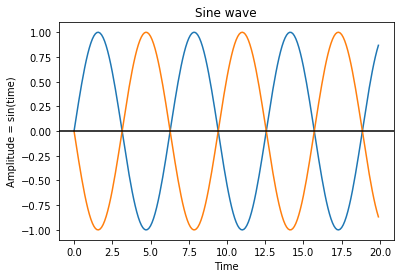

In [12]:
plt.plot(time, amplitude)
plt.plot(time, amplitude_2)
# plt.plot(time, amplitude_3)

plt.title('Sine wave')
plt.xlabel('Time')

plt.ylabel('Amplitude = sin(time)')
plt.axhline(y=0, color='k')
plt.show()

plt.show()

In [5]:
signals = [amplitude, amplitude_2]

In [43]:
# signals = [s - np.mean(s) for s in signals]

# compute analytical signal and take angle to get phase
phases = [np.unwrap(np.angle(hilbert(s))) for s in signals]

# transform to complex phase to prepare for averaging
complex_phase = [np.exp(1j * phase) for phase in phases]

# take the average (sum up all complex phases and divide by number of phases)
# average over each time point
# afterwards we have a vector of (1, #neurons), each entry is the average complex phase at a timepoint
avg = sum(complex_phase) / len(complex_phase)

# length of complex number
phi = np.abs(avg)

# average of order parameter
local_order_parameter = sum(phi) / len(phi)
average_angle = sum(avg) / len(avg)

print("Kuramto Order Parameter", local_order_parameter)

Kuramto Order Parameter 2.4877314113876995e-16


In [42]:
# Mean phase coherence
# * for constant phase differences over trials or time, we get a phase coherence of 1.
# * if phase difference varies over time signals are less coherent and coherence moves towards 0.

phase_difference = processing.phase_difference(signals[0], signals[1], unwrap=True)
phase_coherence = processing.mean_phase_coherence(signals[0], signals[1])
print("Mean phase coherence of: ", phase_coherence)

Mean phase coherence of:  1.0


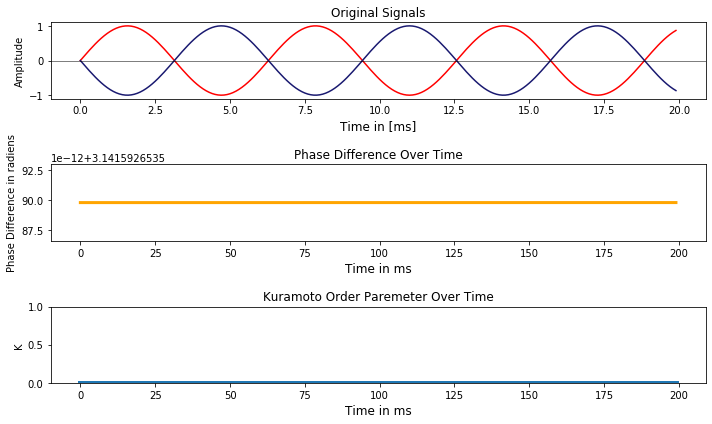

In [72]:
fig, axs = plt.subplots(3, figsize=(10, 6))

axs[0].set_title('Original Signals', fontsize=12)
axs[0].set_xlabel('Time in [ms]', fontsize=12)
axs[0].set_ylabel('Amplitude')
axs[0].plot(time, amplitude, c=plots.c_exc)
axs[0].plot(time, amplitude_2, c=plots.c_inh)
axs[0].axhline(y=0, color='k', linewidth=0.5)

axs[1].set_title(f"Phase Difference Over Time", fontsize=12)
axs[1].set_xlabel("Time in ms", fontsize=12)
axs[1].set_ylabel("Phase Difference in radiens")
axs[1].plot(phase_difference, linewidth=3.0, c="orange")

axs[2].set_title(f"Kuramoto Order Paremeter Over Time", fontsize=12)
axs[2].set_xlabel("Time in ms", fontsize=12)
axs[2].set_ylim(0, 1.0)
axs[2].set_ylabel("K")
axs[2].plot(phi, linewidth=5.0)

plt.tight_layout()
fig.savefig("files/synch_demo", dpi=300)

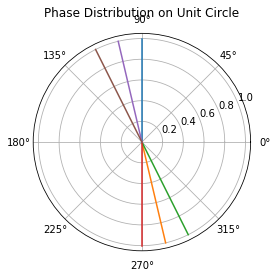

In [48]:
# angle of phases on unit circle, therefore each phase has length 1
# we calculate the Kuramoto order parameter and plot its angle and length. The length expresses the phase sycnrhonization.
# Order Parameter is in [0-1].

plt.axes(polar=True)
plt.title("Phase Distribution on Unit Circle")

for signal in phases:
    for phase in signal[:3]:
        plt.plot((0, phase), (0, 1))

# plot the average phase vector
# length of vector expresses the consistency
plt.plot((0, average_angle), (0, local_order_parameter), c='red')

plt.show()